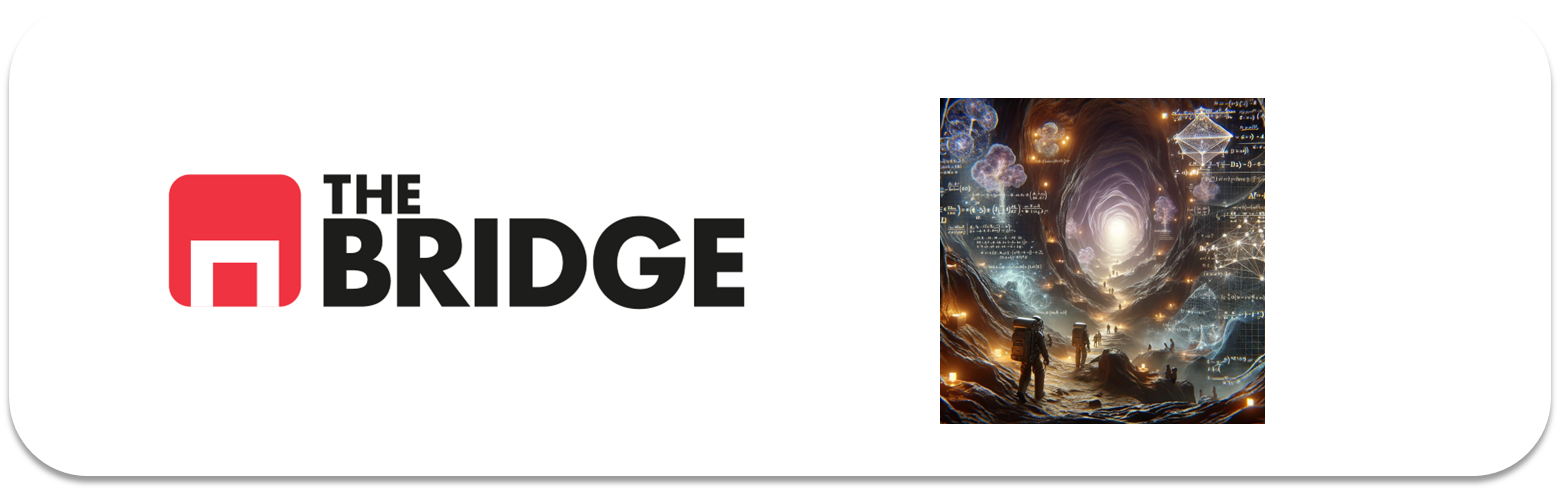

## PRACTICA OBLIGATORIA: **Introducción Deep Learning**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de modelado del dataset del titanic empleando y comparando dos modelos diferentes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [72]:
import funciones_ML as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,classification_report,confusion_matrix
from sklearn.metrics import root_mean_squared_log_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score,RocCurveDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### Descripción y objetivo

El objetivo de la práctica es crear un modelo DL y compararlo con un modelo Random Forest para el dataset de titanic los dos con el mismo objetivo, predecir la supervivencia de un pasajero.  Se pide:  
1. Desarrollar el proceso de ML hasta crear los dos modelos DL y Random Forest. El primero debe tener una topología MLP (es decir una red densa) con un máximo de 3 capas ocultas y debes emplear sklearn para crearlo. No es necesario hacer una análisis/seleccion exahustivo. Escoge una métrica acorde al tipo de target del problema. 

2. Ambos modelos deben tener sus hiperparámetros optimizados, mediante GridSearch. Para ello: utiliza el grid de parámetros que creas conveniente para Random Forest y para el modelo DL, utiliza un grid con los hiperparámetros siguientes:'hidden_layer_sizes','activation', 'solver','alpha' y 'learning_rate'. Para los rangos del grid del modelo de DL guíate por lo visto en el workout y por los posibles valores que se indican en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier). Prueba por lo menos una topología con una sola capa oculta y otra con más de una capa oculta.   
NOTA: Incluye los valores por defecto de los hiperparámetros escogidos en cada caso dentro del grid de hiperparámetros. 
  

3. Compara los modelos respecto a sus métricas medias de accuracy, precision, recall y tiempos de entrenamiento (para ello tendrás que realizar un entrenamiento a parte del mejor modelo obtenido en la optimización de hiperparámetros) y decide cuál te quedarías argumentándolo.    

4. Para el mejor modelo DL obtenido, muestra su clasification report, y la matriz de confusión comentando el resultado.


1 .- CARGAR LOS DATOS

In [2]:
df=pd.read_csv(r"/home/vicevil/Documentos/GitHub/ONLINE_DS_THEBRIDGE_V/SPRING_18_DEEP_LEARNING/UNIT1/TRABAJO OBLIGATORIO/data/titanic.csv")

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


2.- SPLIT

In [5]:
X= df.iloc[:,1:]
y=df.iloc[:,0]

In [6]:
X_train,X_test,y_train,y_test= train_test_split( X, y, test_size=0.2, random_state=42)

3.- MINIEDA CORTO

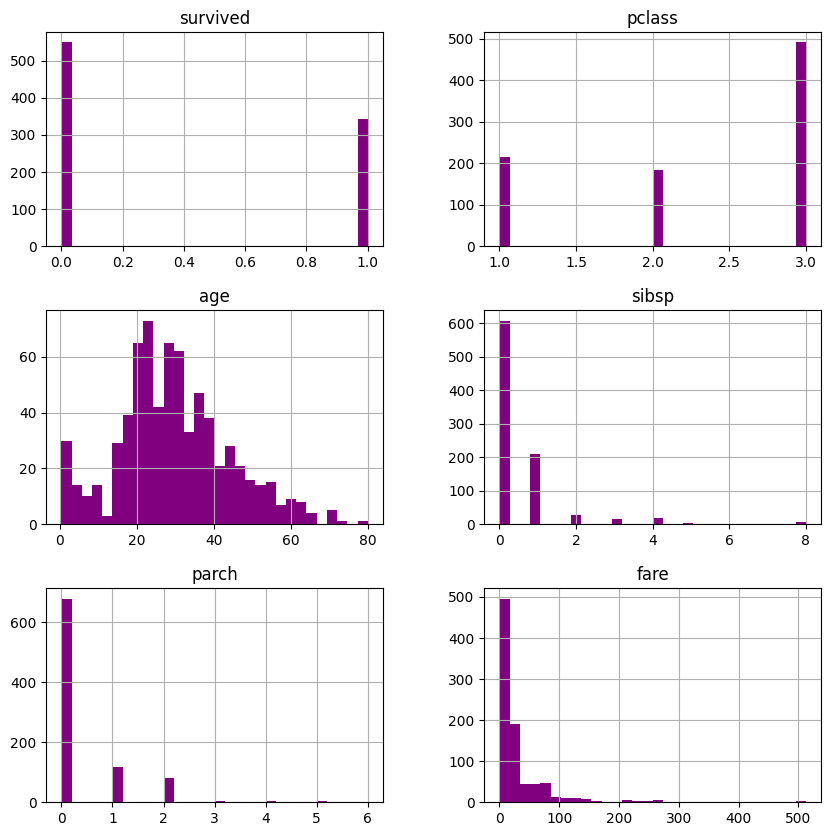

In [7]:
df.hist(figsize=(10,10), bins=30, color="purple");

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [10]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [11]:
columnas_categoricas= ["sex","embarked","class", "who", "adult_male", "deck", "embark_town", "alive"] 
columnas_numericas= ["survived", "pclass", "age", "sibsp", "parch", "fare", "alone"]
columnas_categoricas_2=["sex","embarked", "who", "adult_male", "deck"]

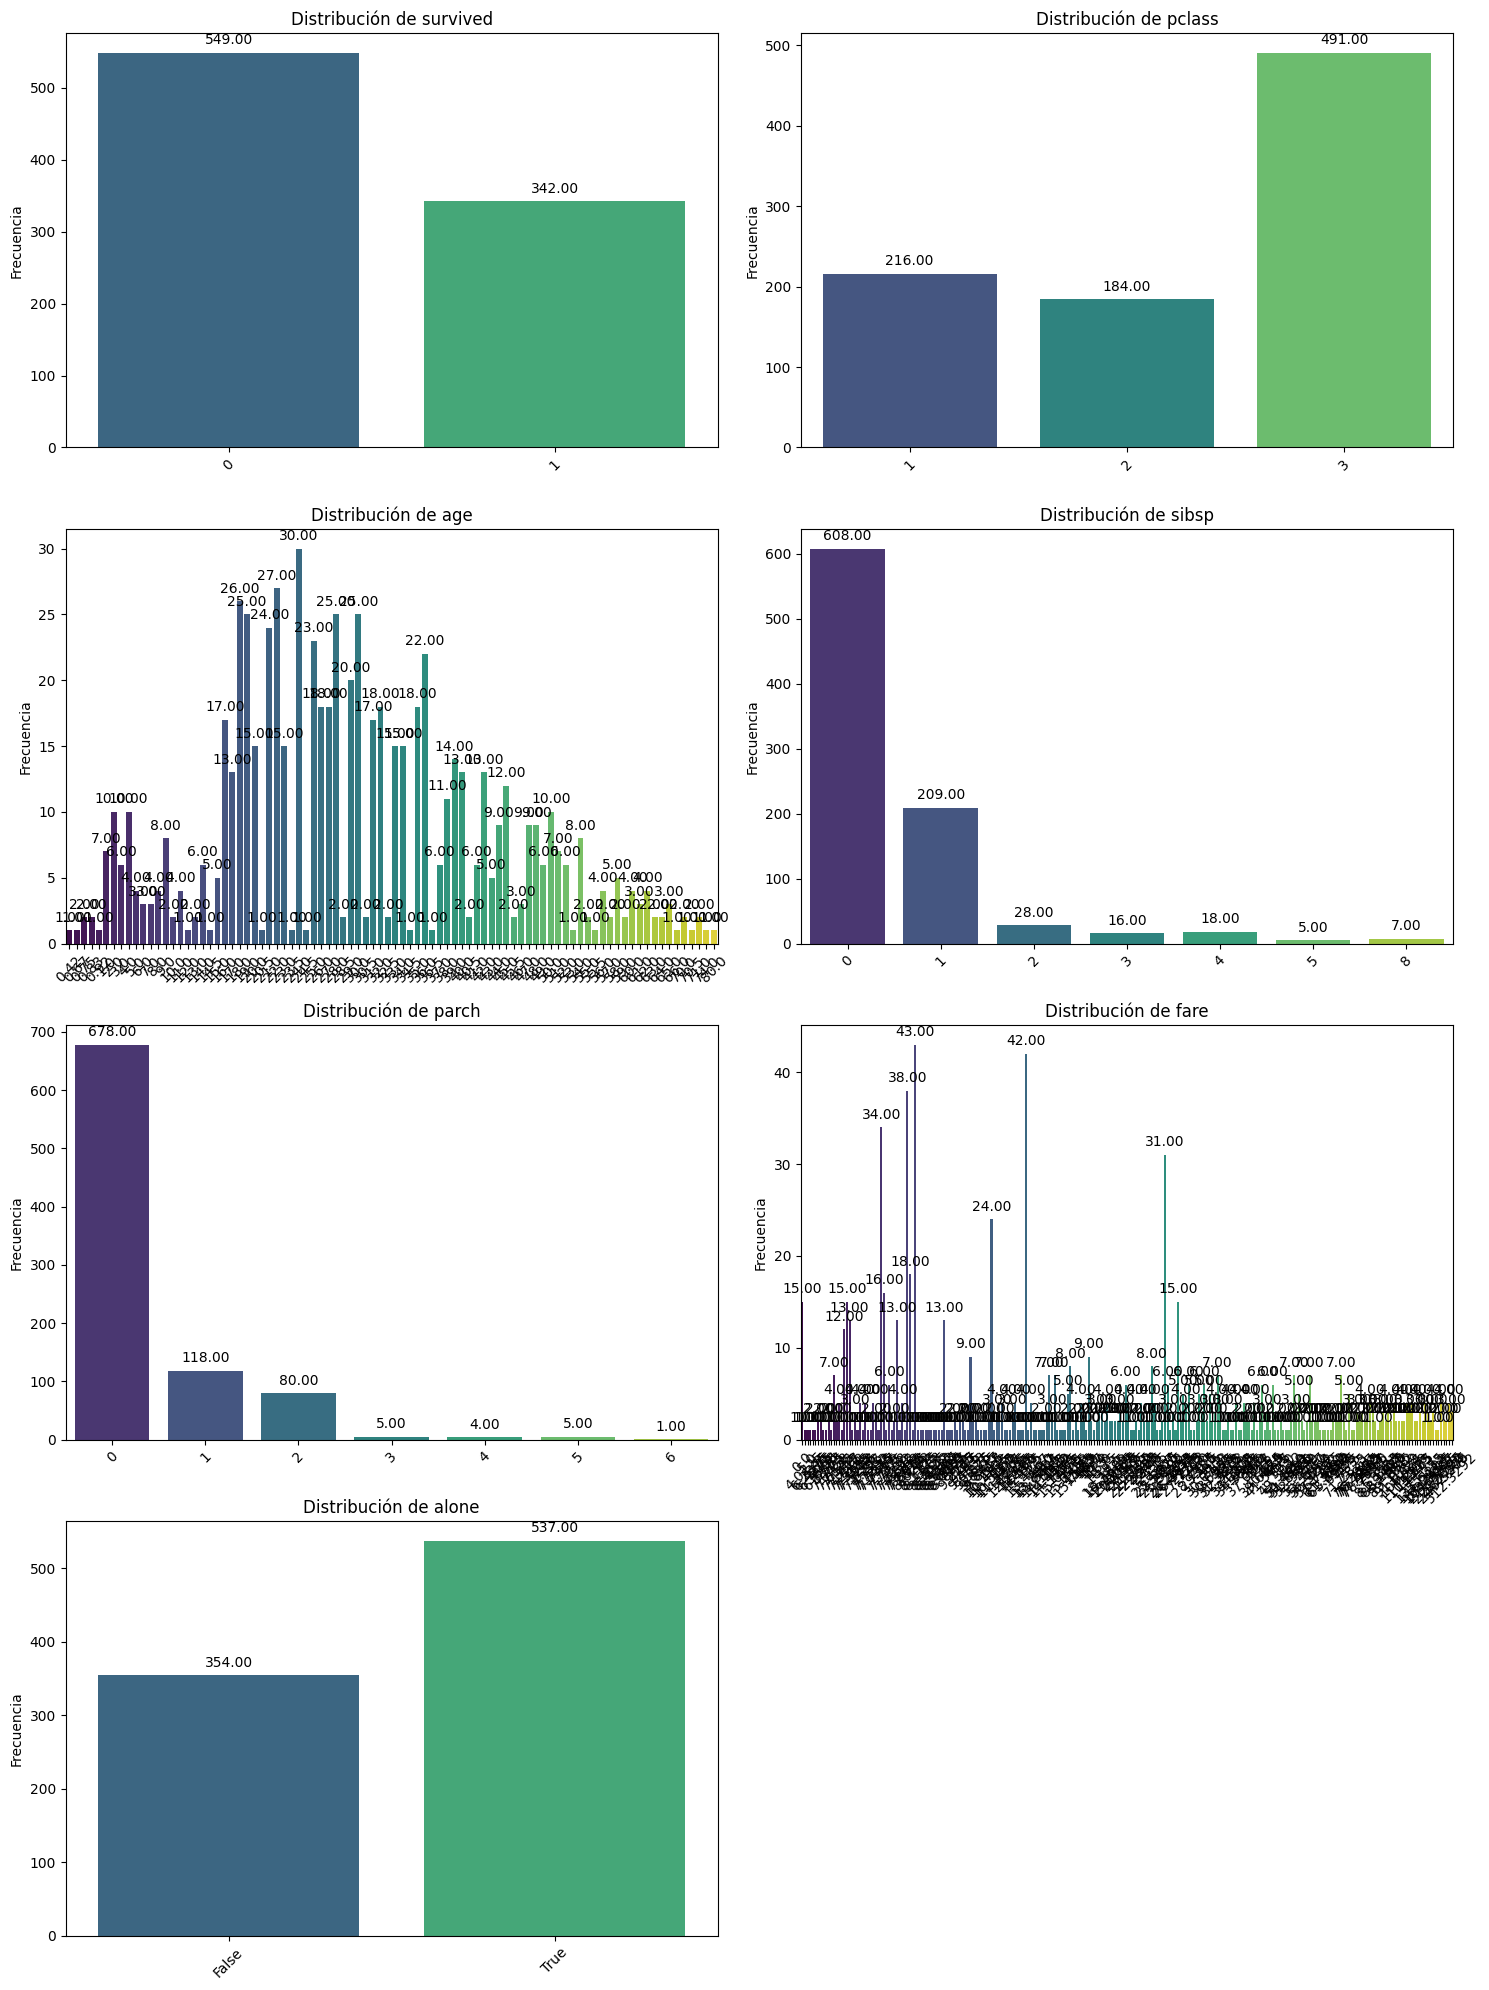

In [12]:
bt.pinta_distribucion_numericas(df=df, columnas_numericas=columnas_numericas, mostrar_valores=True)

In [13]:
counts = df["age"].value_counts()
for value, count in counts.items():
    print(f"Número de veces que aparece '{value}': {count}")

Número de veces que aparece '24.0': 30
Número de veces que aparece '22.0': 27
Número de veces que aparece '18.0': 26
Número de veces que aparece '19.0': 25
Número de veces que aparece '28.0': 25
Número de veces que aparece '30.0': 25
Número de veces que aparece '21.0': 24
Número de veces que aparece '25.0': 23
Número de veces que aparece '36.0': 22
Número de veces que aparece '29.0': 20
Número de veces que aparece '32.0': 18
Número de veces que aparece '35.0': 18
Número de veces que aparece '27.0': 18
Número de veces que aparece '26.0': 18
Número de veces que aparece '16.0': 17
Número de veces que aparece '31.0': 17
Número de veces que aparece '20.0': 15
Número de veces que aparece '34.0': 15
Número de veces que aparece '33.0': 15
Número de veces que aparece '23.0': 15
Número de veces que aparece '39.0': 14
Número de veces que aparece '40.0': 13
Número de veces que aparece '17.0': 13
Número de veces que aparece '42.0': 13
Número de veces que aparece '45.0': 12
Número de veces que apare

In [14]:
counts = df["fare"].value_counts()
for value, count in counts.items():
    print(f"Número de veces que aparece '{value}': {count}")

Número de veces que aparece '8.05': 43
Número de veces que aparece '13.0': 42
Número de veces que aparece '7.8958': 38
Número de veces que aparece '7.75': 34
Número de veces que aparece '26.0': 31
Número de veces que aparece '10.5': 24
Número de veces que aparece '7.925': 18
Número de veces que aparece '7.775': 16
Número de veces que aparece '7.2292': 15
Número de veces que aparece '0.0': 15
Número de veces que aparece '26.55': 15
Número de veces que aparece '7.8542': 13
Número de veces que aparece '8.6625': 13
Número de veces que aparece '7.25': 13
Número de veces que aparece '7.225': 12
Número de veces que aparece '9.5': 9
Número de veces que aparece '16.1': 9
Número de veces que aparece '24.15': 8
Número de veces que aparece '15.5': 8
Número de veces que aparece '14.4542': 7
Número de veces que aparece '69.55': 7
Número de veces que aparece '52.0': 7
Número de veces que aparece '7.05': 7
Número de veces que aparece '56.4958': 7
Número de veces que aparece '14.5': 7
Número de veces q

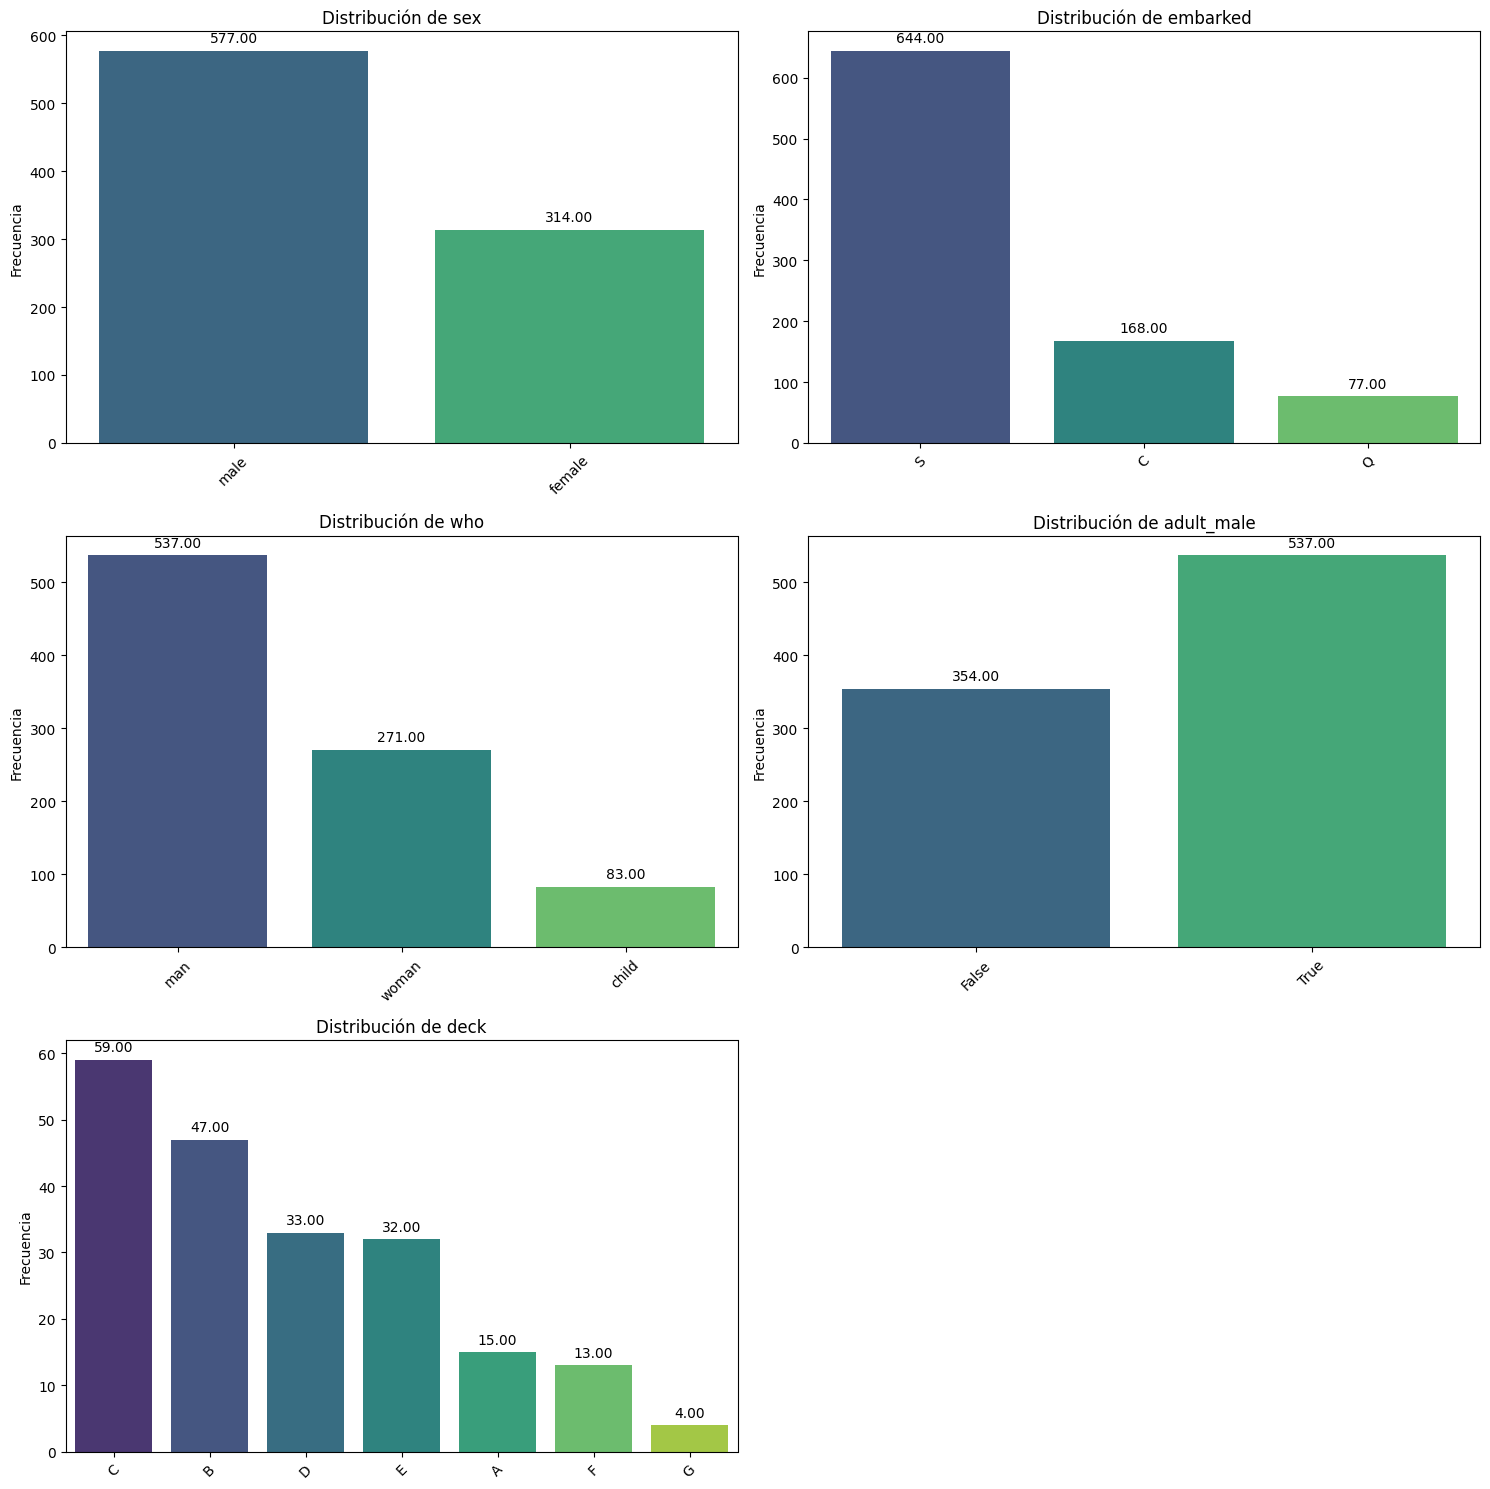

In [15]:
bt.pinta_distribucion_categoricas(df=df, columnas_categoricas=columnas_categoricas_2, mostrar_valores=True)

elimno alive, class y embark_town por estar repetidas y voy a probar imputar la moda a deck , y a ver como se la veo, sino me gusta la eliminare

In [16]:
df.drop(columns={"alive","class", "embark_town"}, inplace=True)

In [17]:
len(df.deck)

891

In [18]:
df.deck.isna().sum()

688

In [19]:
df.deck.mode()[0] # es C la moda
df.deck.fillna("C", inplace=True)

/tmp/ipykernel_14968/1616283527.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.deck.fillna("C", inplace=True)


In [20]:
df.deck.isna().sum()

0

In [21]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,C,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,C,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,C,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,man,True,C,True
887,1,1,female,19.0,0,0,30.0000,S,woman,False,B,True
888,0,3,female,NaN,1,2,23.4500,S,woman,False,C,False
889,1,1,male,26.0,0,0,30.0000,C,man,True,C,True


4.- FEATURES

In [22]:
"SEX" 
sex={"male": "0", "female":"1"}
df["sex"]=df["sex"].map(sex)

In [23]:
"EMBARKED" 
embarked={"S": "1","C":"2", "Q":"0"}
df["embarked"]=df["embarked"].map(embarked)

In [24]:
"WHO"
who={"man":"0", "woman":"1", "child":"2"}
df.who=df.who.map(who)


AGE Y FARE LAS INTENTAMOS CLUSTERIZAR Y QUEDARNOS CON LOS CENTROIDES DE REFERENCIA

In [25]:
#clusterizo la columna AGE  
col= "age"
col_cluster = df[col].copy()
label_encoder= LabelEncoder()
col_cluster_encoded = label_encoder.fit_transform(col_cluster)

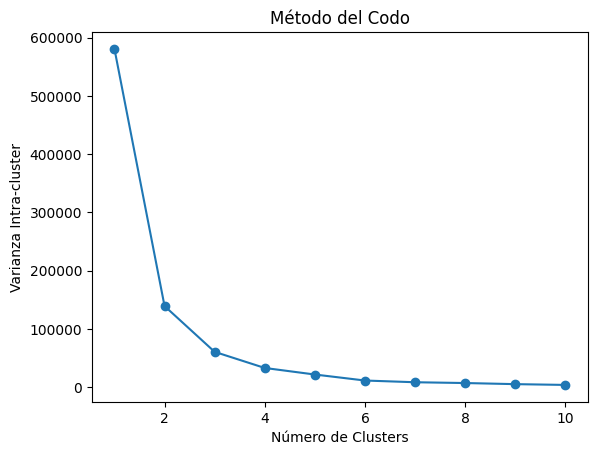

In [26]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(col_cluster_encoded.reshape(-1, 1))
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Varianza Intra-cluster')
plt.title('Método del Codo')
plt.show()


In [27]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(col_cluster_encoded.reshape(-1, 1))#converetimos la matriz unidimensional en bidimensional

KMeans(n_clusters=2)

In [28]:
df["age_cluster"] = kmeans.labels_

In [29]:
df.drop(columns={"age"}, inplace=True)

#HACEMOS LO MISMO A FARE#

In [30]:
col= "fare"
col_cluster2 = df[col].copy()
label_encoder = LabelEncoder()
col_cluster_encoded2 = label_encoder.fit_transform(col_cluster2)

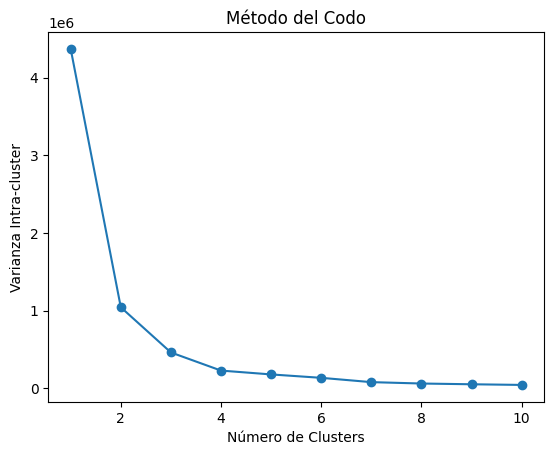

In [31]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(col_cluster_encoded2.reshape(-1, 1))
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Varianza Intra-cluster')
plt.title('Método del Codo')
plt.show()

In [32]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(col_cluster_encoded.reshape(-1, 1))#converetimos la matriz unidimensional en bidimensional

KMeans(n_clusters=2)

In [33]:
df["fare_cluster"] = kmeans.labels_

In [34]:
df.drop(columns={"fare"}, inplace=True)

In [35]:
#mapeo deck
mape={"C": 0, "B":1 , "S":2}
df["deck_map"]= df["deck"].map(mape)

In [36]:
df.drop(columns={"deck"}, inplace=True)

In [37]:
df.deck_map.mean()

0.05919395465994962

In [38]:
df.deck_map.fillna(0, inplace=True)

/tmp/ipykernel_14968/1705878014.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.deck_map.fillna(0, inplace=True)


In [39]:
df.embarked.mode()[0]

'1'

In [40]:
df.embarked.fillna(1, inplace=True)

/tmp/ipykernel_14968/2542337780.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.embarked.fillna(1, inplace=True)


In [41]:
df

,survived,pclass,sex,sibsp,parch,embarked,who,adult_male,alone,age_cluster,fare_cluster,deck_map
0,0,3,0,1,0,1,0,True,False,0,0,0.0
1,1,1,1,1,0,2,1,False,False,0,0,0.0
2,1,3,1,0,0,1,1,False,True,0,0,0.0
3,1,1,1,1,0,1,1,False,False,0,0,0.0
4,0,3,0,0,0,1,0,True,True,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,True,True,0,0,0.0
887,1,1,1,0,0,1,1,False,True,0,0,1.0
888,0,3,1,1,2,1,1,False,False,1,1,0.0
889,1,1,0,0,0,2,0,True,True,0,0,0.0


In [42]:
scaler=MinMaxScaler()
arrray_df=scaler.fit_transform(df)

In [43]:
df_minmax=pd.DataFrame(arrray_df)

In [44]:
df_minmax

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.0,0.0,0.125,0.000000,0.5,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.125,0.000000,1.0,0.5,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.000,0.000000,0.5,0.5,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.125,0.000000,0.5,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.000,0.000000,0.5,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.0,0.000,0.000000,0.5,0.0,1.0,1.0,0.0,0.0,0.0
887,1.0,0.0,1.0,0.000,0.000000,0.5,0.5,0.0,1.0,0.0,0.0,1.0
888,0.0,1.0,1.0,0.125,0.333333,0.5,0.5,0.0,0.0,1.0,1.0,0.0
889,1.0,0.0,0.0,0.000,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sibsp,891.0,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
age_cluster,891.0,0.358025,0.479689,0.0,0.0,0.0,1.0,1.0
fare_cluster,891.0,0.358025,0.479689,0.0,0.0,0.0,1.0,1.0
deck_map,891.0,0.052750,0.223659,0.0,0.0,0.0,0.0,1.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   pclass        891 non-null    int64  
 2   sex           891 non-null    object 
 3   sibsp         891 non-null    int64  
 4   parch         891 non-null    int64  
 5   embarked      891 non-null    object 
 6   who           891 non-null    object 
 7   adult_male    891 non-null    bool   
 8   alone         891 non-null    bool   
 9   age_cluster   891 non-null    int32  
 10  fare_cluster  891 non-null    int32  
 11  deck_map      891 non-null    float64
dtypes: bool(2), float64(1), int32(2), int64(4), object(3)
memory usage: 64.5+ KB


In [47]:
df.to_csv(r"/home/vicevil/Documentos/GitHub/ONLINE_DS_THEBRIDGE_V/SPRING_18_DEEP_LEARNING/UNIT1/TRABAJO OBLIGATORIO/data/titanic_tratado", index=False)

5.- SELECCION MODELOS Y ENTRENAMIENTO

#hacemos el split con todo modificado

In [48]:
X=df.iloc[:, 1:]
y=df.iloc[:,0]

In [49]:
X_max=df_minmax.iloc[:, 1:]
y_max=df_minmax.iloc[:,0]

In [50]:
X_train_scal,X_test_scal,y_train_scal,y_test_scal= train_test_split( X, y, test_size=0.2, random_state=42)

print(X_train_scal.shape)
print(y_train_scal.shape)
print(X_test_scal.shape)
print(y_test_scal.shape)

(712, 11)
(712,)
(179, 11)
(179,)


In [51]:
X_train_max,X_test_max,y_train_max,y_test_max= train_test_split( X_max, y_max, test_size=0.2, random_state=42)

print(X_train_max.shape)
print(y_train_max.shape)
print(X_test_max.shape)
print(y_test_max.shape)

(712, 11)
(712,)
(179, 11)
(179,)


El objetivo de la práctica es crear un modelo DL y compararlo con un modelo Random Forest para el dataset de titanic los dos con el mismo objetivo, predecir la supervivencia de un pasajero.  Se pide:  
1. Desarrollar el proceso de ML hasta crear los dos modelos DL y Random Forest. El primero debe tener una topología MLP (es decir una red densa) con un máximo de 3 capas ocultas y debes emplear sklearn para crearlo. No es necesario hacer una análisis/seleccion exahustivo. Escoge una métrica acorde al tipo de target del problema. 

2. Ambos modelos deben tener sus hiperparámetros optimizados, mediante GridSearch. Para ello: utiliza el grid de parámetros que creas conveniente para Random Forest y para el modelo DL, utiliza un grid con los hiperparámetros siguientes:'hidden_layer_sizes','activation', 'solver','alpha' y 'learning_rate'. Para los rangos del grid del modelo de DL guíate por lo visto en el workout y por los posibles valores que se indican en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier). Prueba por lo menos una topología con una sola capa oculta y otra con más de una capa oculta.   
NOTA: Incluye los valores por defecto de los hiperparámetros escogidos en cada caso dentro del grid de hiperparámetros. 
  

3. Compara los modelos respecto a sus métricas medias de accuracy, precision, recall y tiempos de entrenamiento (para ello tendrás que realizar un entrenamiento a parte del mejor modelo obtenido en la optimización de hiperparámetros) y decide cuál te quedarías argumentándolo.    

4. Para el mejor modelo DL obtenido, muestra su clasification report, y la matriz de confusión comentando el resultado.

5.- DISEÑO DE MODELOS DP

In [52]:
df.isna().sum()

survived        0
pclass          0
sex             0
sibsp           0
parch           0
embarked        0
who             0
adult_male      0
alone           0
age_cluster     0
fare_cluster    0
deck_map        0
dtype: int64

In [53]:
# Creamos primer modelo de red neuronal

mlp = MLPClassifier(activation="logistic",hidden_layer_sizes=(100, 100,100), max_iter=1000, random_state=42)

# Registramos el tiempo de entrenamiento y predicción
start = time.time()
mlp.fit(X_train_scal, y_train_scal)
end = time.time()

train_time = end - start

start = time.time()
y_pred = mlp.predict(X_test_scal)
end = time.time()

pred_time = end - start

# Guardamos las métricas de evaluación en un dataframe

mlp_metrics = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                            'precision': precision_score(y_test, y_pred, average = "macro"),
                            'recall': recall_score(y_test, y_pred, average = "macro"),
                            'train_time': train_time,
                            'pred_time': pred_time}, index=['MLPC']
                            )
mlp_metrics.head()

,accuracy,precision,recall,train_time,pred_time
MLPC,0.815642,0.813699,0.80296,1.907666,0.003908


In [54]:
#MODELO RANDON FOREST CLASIFICADOR
rf= RandomForestClassifier(n_estimators=100, max_depth=10, max_leaf_nodes=30, min_samples_split=50, random_state=42)

# Registramos el tiempo de entrenamiento y predicción
start = time.time()
rf.fit(X_train_scal, y_train_scal)
end = time.time()

train_time = end - start

start = time.time()
y_pred_rf= rf.predict(X_test_scal)

end = time.time()

pred_time = end - start

# Guardamos las métricas de evaluación en un dataframe

rf_metrics = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred_rf),
                            'precision': precision_score(y_test, y_pred_rf, average = "macro"),
                            'recall': recall_score(y_test, y_pred_rf, average = "macro"),
                            'train_time': train_time,
                            'pred_time': pred_time}, index=['RFC']
                            )
rf_metrics.head()

,accuracy,precision,recall,train_time,pred_time
RFC,0.821229,0.822758,0.805727,0.131813,0.004753


6.- SELECCION HIPERPARAMETROS

In [61]:
# MLP CLASSIFIER

# Definición del espacio de búsqueda
param_grid = {
    "hidden_layer_sizes": [(10,), (10, 10), (10, 10, 10)],
    "activation": ["relu", "logistic", "identity"],
    "solver": ['lbfgs',"adam", "sgd"],
    "learning_rate": ['adaptive', 'invscaling', 'constant'],
    "max_iter": [100, 200, 500],
    "alpha": [0.0001, 0.001, 0.01],
    "random_state":[42],
    "verbose":[0]
    }

# Creación del modelo MLP
mlp_H = MLPClassifier()

#tiempo - Búsqueda de hiperparámetros y entrenamiento con VC
start = time.time()
grid_search= GridSearchCV(mlp_H, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scal, y_train_scal)
end = time.time()

train_time = end - start

# Obtención de los mejores hiperparámetros
best_params = grid_search.best_params_

# Evaluación del modelo con los mejores hiperparámetros
score = grid_search.score(X_test_scal, y_test_scal)

start = time.time()
#mejor modelo
best_model= grid_search.best_estimator_
y_pred_H=best_model.predict(X_test_scal)
end = time.time()

pred_time = end - start

# Evaluación del modelo con los mejores hiperparámetros
mlp_metrics_H = pd.DataFrame({'accuracy': accuracy_score(y_test_scal, y_pred_H),
                            'precision': precision_score(y_test_scal, y_pred_H, average = "macro"),
                            'recall': recall_score(y_test_scal, y_pred_H, average = "macro"),
                            'train_time': train_time,
                            'pred_time': pred_time}, index=['RFCH']
                            )
mlp_metrics_H.head()


/home/vicevil/miniconda3/envs/base.ENV/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vicevil/miniconda3/envs/base.ENV/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vicevil/miniconda3/envs/base.ENV/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

/home/vicevil/miniconda3/envs/base.ENV/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vicevil/miniconda3/envs/base.ENV/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vicevil/miniconda3/envs/base.ENV/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vicevil/miniconda3/envs/base.ENV/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't conv

,accuracy,precision,recall,train_time,pred_time
RFCH,0.810056,0.815826,0.790219,415.891182,0.001164


In [56]:
#PARA RANDON FOREST

# Definición del espacio de búsqueda
param_grid = {
    "n_estimators": [200],
    "max_depth":[2,4,6,8,10],
    "min_samples_split":[10,20,30],
    "min_samples_leaf":[10,20,30],
    "max_features": ["sqrt"],
    "random_state": [42]
}
f), an instance of 'bool'
rf_H = RandomForestClassifier()

#tiempo - Búsqueda de hiperparámetros y entrenamiento con VC
start = time.time()
grid_search= GridSearchCV(rf_H, param_grid=param_grid, cv=5, verbose=0)
grid_search.fit(X_train_scal, y_train_scal)
end = time.time()

train_time = end - start

# Obtención de los mejores hiperparámetros
best_params = grid_search.best_params_

# Evaluación del modelo con los mejores hiperparámetros
score = grid_search.score(X_test_scal, y_test_scal)

start = time.time()
#mejor modelo
best_model= grid_search.best_estimator_
y_pred_rf_H=best_model.predict(X_test_scal)
end = time.time()

pred_time = end - start

# Evaluación del modelo con los mejores hiperparámetros
rf_metrics_H = pd.DataFrame({'accuracy': accuracy_score(y_test_scal, y_pred_rf_H),
                            'precision': precision_score(y_test_scal, y_pred_rf_H, average = "macro"),
                            'recall': recall_score(y_test_scal, y_pred_rf_H, average = "macro"),
                            'train_time': train_time,
                            'pred_time': pred_time}, index=['RFCH']
                            )
rf_metrics_H.head()


,accuracy,precision,recall,train_time,pred_time
RFCH,0.810056,0.805701,0.800193,38.759716,0.007371


In [62]:
# Comparamos los resultados de ambos modelos
metrics = pd.concat([rf_metrics,rf_metrics_H, mlp_metrics, mlp_metrics_H])
metrics.head()

,accuracy,precision,recall,train_time,pred_time
RFC,0.821229,0.822758,0.805727,0.131813,0.004753
RFCH,0.810056,0.805701,0.800193,38.759716,0.007371
MLPC,0.815642,0.813699,0.802960,1.907666,0.003908
RFCH,0.810056,0.815826,0.790219,415.891182,0.001164


3.- COMPARACION DE MODELOS Y CONCLUSION

-Los 4 modelos tienen metricas muy similiares habiendo ganado el **modelo de ML randonforest**, el cual muestra la proporcion de predicciones correctas mas alta, ademas de tener el recall o sensibilidad mas alta, y teniendo encuenta el problema de negocio donde nos piden que clasifiquemos los fallecidos o supervivientes de un naufragio, interesa tener esta metrica mas alta posible.<br>
-Respeto a los tiempos de entrenamiento y predicciones los modelos ML son mas rapidos que los modelos DL para este Dataset
 

4.- INFORME DE CLASIFICACION Y MATRIX

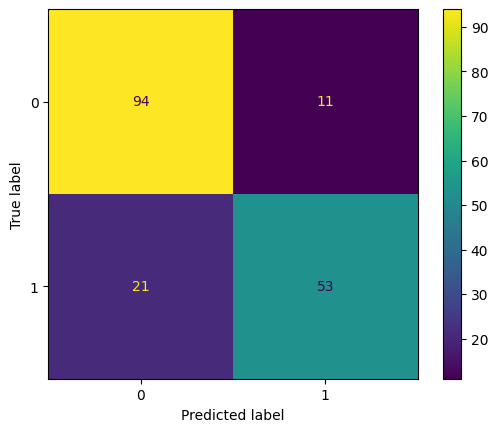

In [75]:
# Visualizar la matriz de confusión
grafica = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_scal, y_pred_rf))
grafica.plot()
plt.show()


- En la matriz se puede observar que ha habiedo un total de 94 aciertos en el 0 con 11 falsos poitivos y un total de 53 aciertos en el 1 , con sus 21 falsos posotivos, es decir que en los aciertos en el 0 ha habido un 90% y en el 1 un 60% de aciertos.
- En resumen, el modelo ML tuvo un buen rendimiento en la predicción de la clase 0, pero cometió algunos errores al predecir la clase 1, principalmente falsos negativos (39.6%) y en menor medida falsos positivos (11.7%).

In [67]:
print(classification_report(y_test_scal,y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



- La sensibilidad o recall es mayor en detectar supervivientes que fallecidos, aunque ambas estas en valores correctos, siendo esto para el problema planteado bastante bueno, ya que es mejor no detectar a un fallecido y contarlo como superviviente que el reves.  